# ANALIZA SIGNALOV ZBRANIH SKOZI APLIKACIJO GaitAuth

V tem delu bo fokus na analizi in pridobivanju informacij iz podatkov zbranih iz najine aplikacije. Podatki so zbrani s pomočjo senzorjev, bolj specifično je fokus na pospeškometru. Za začetek imava 4 različne datoteke v katerih je reprezentirana hoja različnih uporabnikov.

V primeru, da se bo izbira informacij v datoteki pokazala za napremirno jo bomo popravili.

In [1]:
#imports
import os
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
data_path = os.getcwd()+"/data/fri-tilen1.csv"
print("Loading data from:",data_path)
data = pd.read_csv(data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",data.shape, "")
print("")

#prikaz podatkov v datoteki
data

Loading data from: D:\Python notebook\ARP python/data/fri-tilen1.csv
Done. Loaded data frame (rows, columns): (878, 5) 



,timestamp,accX,accY,accZ,username
1,2153601643874428,-0.478836,-7.623138,-2.968811,fri-tilen1
2,2153601667311928,-0.900223,-7.144302,-2.260132,fri-tilen1
3,2153601690749428,1.321594,-7.297531,0.536301,fri-tilen1
4,2153601714186928,4.194641,-7.910446,0.957687,fri-tilen1
5,2153601737624428,4.137177,-9.423584,1.474823,fri-tilen1
...,...,...,...,...,...
874,2153615475863864,0.632065,-17.946930,-3.332733,fri-tilen1
875,2153615491702487,0.555450,-14.346054,-2.681503,fri-tilen1
876,2153615507541110,2.528275,-11.032486,1.838745,fri-tilen1
877,2153615523379733,5.133163,-8.159439,2.221817,fri-tilen1


In [3]:
z_data_path = os.getcwd()+"/data/ziga2.csv"
print("Loading data from:", data_path)
z_data = pd.read_csv(z_data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",data.shape, "")
print("")

#prikaz podatkov v datoteki
z_data

Loading data from: D:\Python notebook\ARP python/data/fri-tilen1.csv
Done. Loaded data frame (rows, columns): (878, 5) 



,timestamp,accX,accY,accZ,username
1,2159339604606949,-7.814682,-16.261414,-8.983047,ziga2
2,2159339621391617,-4.424484,-12.871231,-7.489059,ziga2
3,2159339635643326,-2.451660,-9.097961,-5.803543,ziga2
4,2159339649925552,-0.459686,-5.726929,-4.616028,ziga2
5,2159339664207779,1.225830,-3.658340,-3.026276,ziga2
...,...,...,...,...,...
874,2159353424281892,-5.918472,-13.043610,-2.049438,ziga2
875,2159353440151032,-7.010223,-13.541611,-0.574615,ziga2
876,2159353456020173,-6.301544,-12.507309,-0.574615,ziga2
877,2159353471889313,-3.505112,-10.840942,-2.528275,ziga2


In [4]:
#preveri nove podatke
x_data_path = os.getcwd()+"/data/n5_r_u0_0-fri.csv"
print("Loading data from:",x_data_path)
x_data = pd.read_csv(x_data_path,sep=",",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",x_data.shape, "")
print("")

#prikaz podatkov v datoteki
x_data

Loading data from: D:\Python notebook\ARP python/data/n5_r_u0_0-fri.csv
Done. Loaded data frame (rows, columns): (3808, 5) 



,timestamp,accX,accY,accZ,username
0,1574275395239,-1.072601,-5.746078,5.401321,testz
1,1574275395255,-2.604889,-6.895294,3.256119,testz
2,1574275395271,-0.689529,-8.772354,0.076614,testz
3,1574275395286,1.551437,-10.170563,-0.900223,testz
4,1574275395302,1.915359,-10.860092,-0.019150,testz
...,...,...,...,...,...
3803,1574275455552,1.915359,-11.224014,-1.130066,testz
3804,1574275455567,1.896210,-12.124237,-1.532288,testz
3805,1574275455584,1.551437,-12.162552,-2.106903,testz
3806,1574275455599,0.708679,-11.817780,-2.719818,testz


In [5]:
timestamp_avg = 0
for index in range(2, len(data)):
    timestamp_avg += data['timestamp'][index] - data['timestamp'][index-1]
1 / ((timestamp_avg/len(data)) * pow(10, -9))

63.25873874508382

In [6]:
timestamp_avg = 0
for index in range(2, len(z_data)):
    timestamp_avg += z_data['timestamp'][index] - z_data['timestamp'][index-1]
1 / ((timestamp_avg/len(z_data)) * pow(10, -9))

63.3144964495222

In [7]:
result = (data['timestamp'][2] - data['timestamp'][1]) * pow (10, -9)
result

1/ 0.0234375

42.666666666666664

In [8]:
#funkcija, ki naredi primikajoče povprečje nad našimi podatki
#kot parametre sprejme podatke ter število segmentov, ki naj jih uporabi za premikajoče povprečje
def moving_avg_filter(data, num_of_segments):
    rolling_data = data.rolling(window=num_of_segments).mean()
    return rolling_data

def low_pass_filter(data, num_of_signals):
    fs = 63  # Sampling frequency
    fc = 4  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    n = 5 #The order of the filter.
    b, a = signal.butter(n, w, 'low') #Numerator (b) and denominator (a) polynomials of the IIR filter
    return signal.filtfilt(b, a, data[:num_of_signals])

def simple_one_signal_plot(data, sample_length,label_text, title_text):
    plt.figure(figsize = (15,5))
    plt.plot(data[:sample_length], label = label_text)
    plt.legend()
    plt.title(title_text)
    plt.show()
    
    
def display_multiple_signals_plot(data, labels, sample_length, title):
    plt.figure(figsize = (15,5))
    for index in range (0, len(data)):
        plt.plot(data[index][:sample_length], label = labels[index])
    plt.legend()
    plt.title(title)
    plt.show()
    
def display_signal_with_peaks(data, peaks, sample_length, label, title):
    plt.figure(figsize = (15,5))
    plt.plot(data[:sample_length], label = label)
    if len(peaks) > 0:
        plt.vlines(peaks[0], -20, 20, color='C1', label = "peak")
    else:
        print("no peaks found")
    for peak in range (1, len(peaks)):
        if(peaks[peak] >= sample_length):
            break
        plt.vlines(peaks[peak], -20, 20, color='C1')
    plt.legend()
    plt.title(title)
    plt.show()

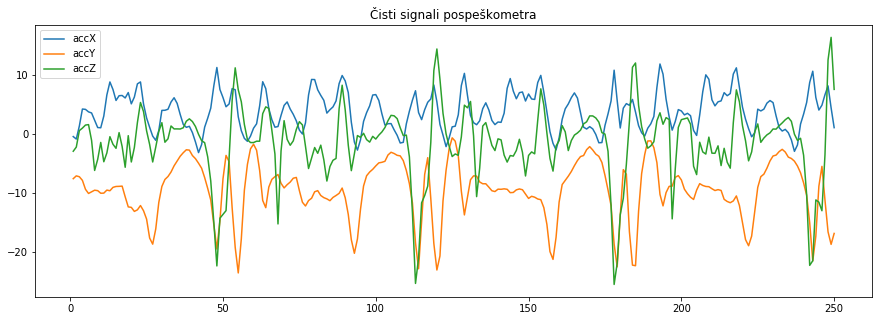

In [9]:
#naredi graf z vsemi podatki
display_multiple_signals_plot([data["accX"], data["accY"], data["accZ"]], ["accX", "accY", "accZ"], 250, "Čisti signali pospeškometra")

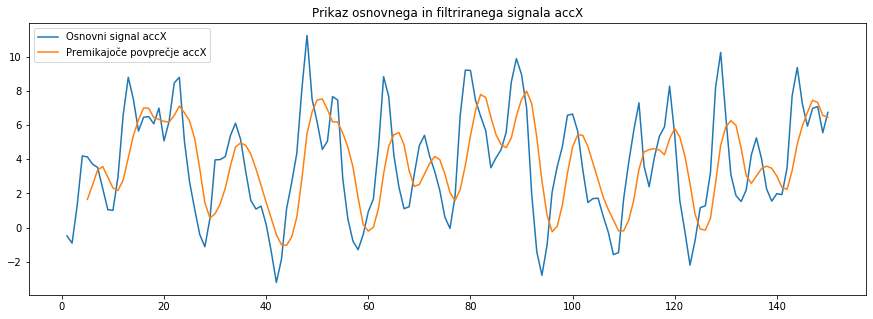

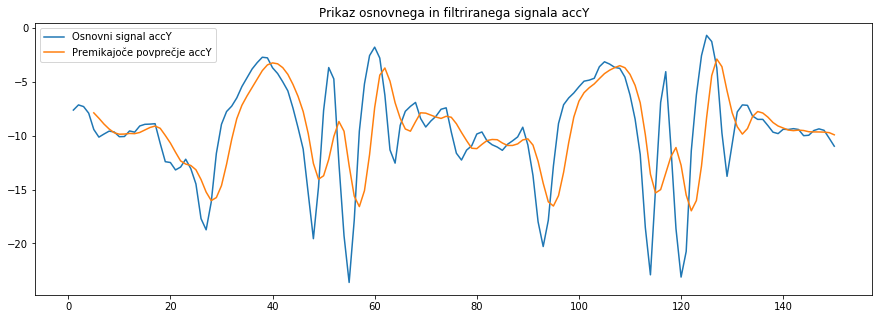

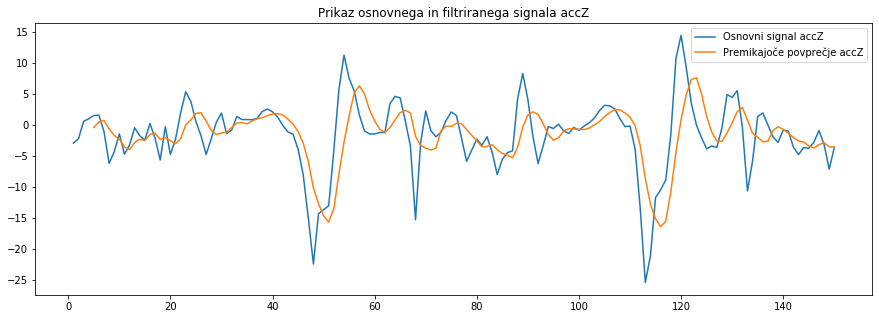

In [10]:
#primerjaj vsakega od signalov po filtiranju z premikajočim povprečjem
display_multiple_signals_plot([data["accX"], moving_avg_filter(data["accX"], 5)], ["Osnovni signal accX", "Premikajoče povprečje accX"], 150, "Prikaz osnovnega in filtriranega signala accX")

display_multiple_signals_plot([data["accY"], moving_avg_filter(data["accY"], 5)], ["Osnovni signal accY", "Premikajoče povprečje accY"], 150, "Prikaz osnovnega in filtriranega signala accY")

display_multiple_signals_plot([data["accZ"], moving_avg_filter(data["accZ"], 5)], ["Osnovni signal accZ", "Premikajoče povprečje accZ"], 150, "Prikaz osnovnega in filtriranega signala accZ")

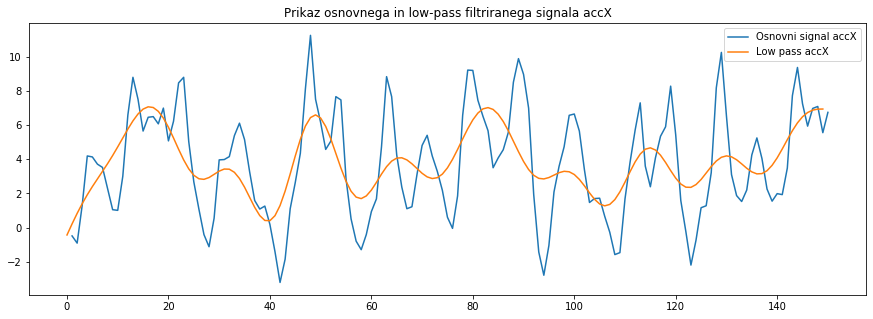

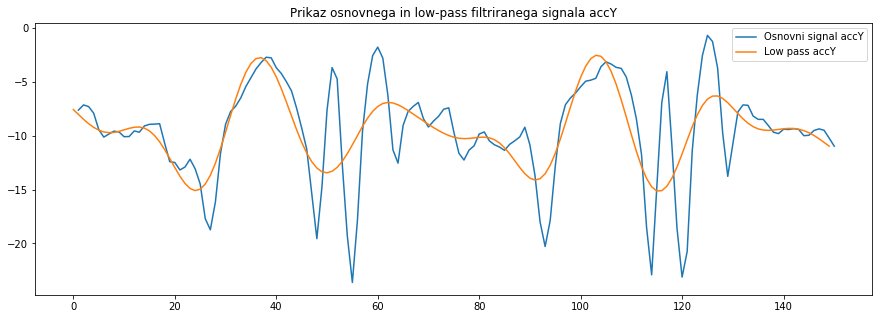

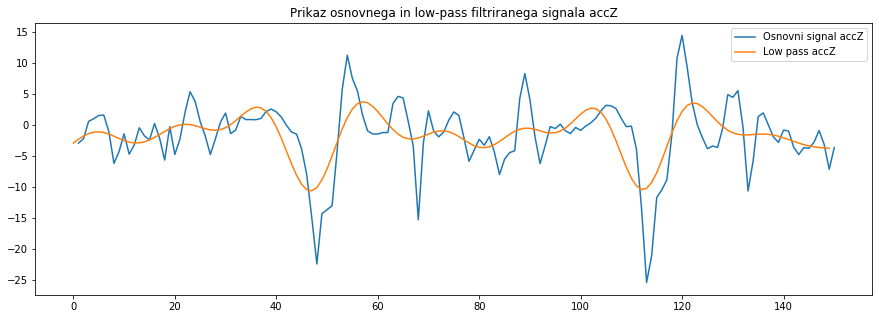

In [11]:
#lowpass filter
display_multiple_signals_plot([data["accX"], low_pass_filter(data["accX"], 150)], ["Osnovni signal accX", "Low pass accX"], 150, "Prikaz osnovnega in low-pass filtriranega signala accX")

display_multiple_signals_plot([data["accY"], low_pass_filter(data["accY"], 150)], ["Osnovni signal accY", "Low pass accY"], 150, "Prikaz osnovnega in low-pass filtriranega signala accY")

display_multiple_signals_plot([data["accZ"], low_pass_filter(data["accZ"], 150)], ["Osnovni signal accZ", "Low pass accZ"], 150, "Prikaz osnovnega in low-pass filtriranega signala accZ")


In [12]:
"""def butter_low_pass(order, fs, fc):
    n = order #order of low pass filter
    RC = 1 / (2 * math.pi * fc)
    alpha = (1/fs)/((1/fs) + RC)
    ω = 1 #angular velocity
    ωc = 1/alpha # cutoff frequency
    G_zero = pow(1/math.sqrt(2),n) #is the DC gain (gain at zero frequency)
    s = 1j*ω



butter_low_pass(5, 63, 4)"""

'def butter_low_pass(order, fs, fc):\n    n = order #order of low pass filter\n    RC = 1 / (2 * math.pi * fc)\n    alpha = (1/fs)/((1/fs) + RC)\n    ω = 1 #angular velocity\n    ωc = 1/alpha # cutoff frequency\n    G_zero = pow(1/math.sqrt(2),n) #is the DC gain (gain at zero frequency)\n    s = 1j*ω\n\n\n\nbutter_low_pass(5, 63, 4)'

0.15943272086967314


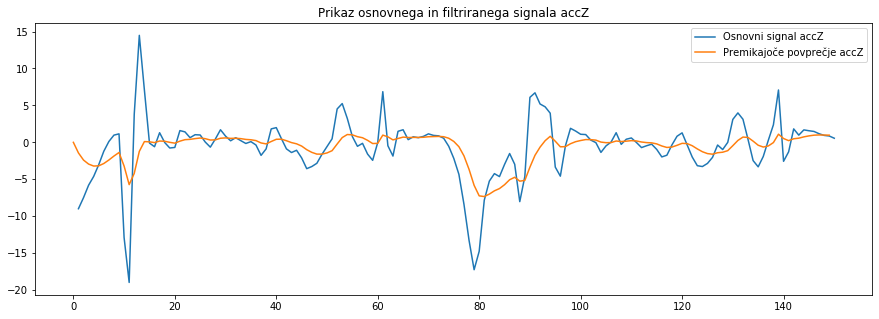

0.15943272086967314


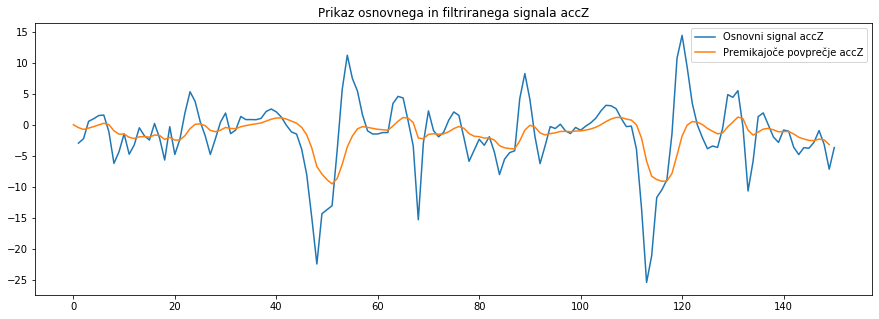

No handles with labels found to put in legend.


0.15943272086967314
0.15943272086967314


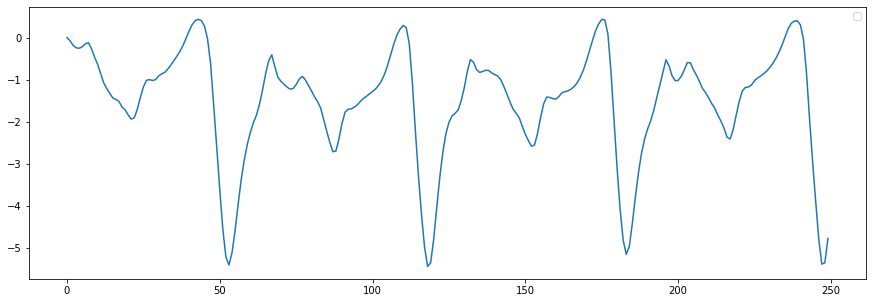

In [49]:
def lowpass_implementation(data, fc):
    y = [0] * len(data)
    RC = 1/(2*math.pi*fc)
    #alpha = 0.25
    #alpha = 60/(60 + RC)
    alpha = (fc) * (fc + RC)
    print(alpha)
    y[1] = alpha * data[1]
    for i in range(2, len(data)):
        #y[i] = alpha * data[i] + (1 - alpha) * y[i - 1]
        y[i] = y[i-1] + alpha * (data[i] - y[i - 1])
    return y
    
#simple_one_signal_plot(data["accZ"], 250, "", "")
#simple_one_signal_plot(lowpass_implementation(data["accZ"], 1/60), 250, "", "")
#simple_one_signal_plot(lowpass_implementation(dataZ["accZ"], 1/60), 250, "", "")
display_multiple_signals_plot([z_data["accZ"], lowpass_implementation(z_data["accZ"], 1/60)], ["Osnovni signal accZ", "Premikajoče povprečje accZ"], 150, "Prikaz osnovnega in filtriranega signala accZ")
display_multiple_signals_plot([data["accZ"], lowpass_implementation(data["accZ"], 1/60)], ["Osnovni signal accZ", "Premikajoče povprečje accZ"], 150, "Prikaz osnovnega in filtriranega signala accZ")

simple_one_signal_plot(lowpass_implementation(lowpass_implementation(data["accZ"], 1/60), 1/60), 250, "", "")

No handles with labels found to put in legend.


0.15943272086967314


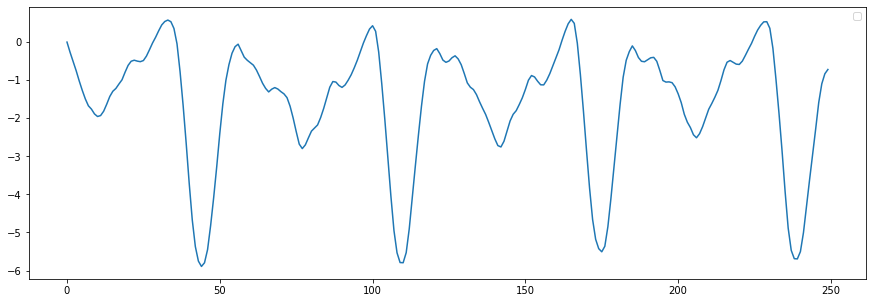

In [50]:
moving_sample = 10
test = moving_avg_filter(data["accZ"], moving_sample)[moving_sample:].reset_index()
lpt = lowpass_implementation(test["accZ"], 1/60)
simple_one_signal_plot(lpt, 250, "", "")

No handles with labels found to put in legend.


0.15943272086967314


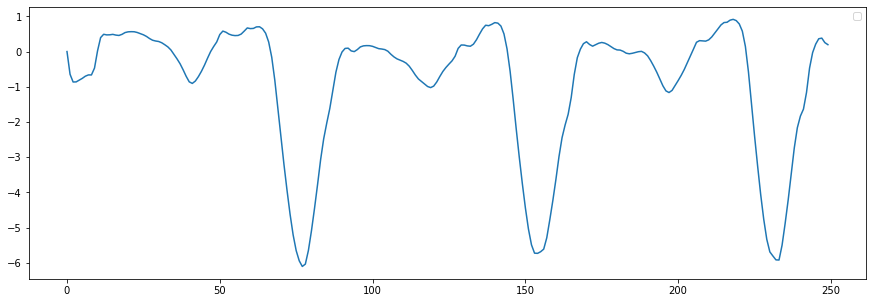

In [51]:
moving_sample = 10
test = moving_avg_filter(z_data["accZ"], moving_sample)[moving_sample:].reset_index()
lpt = lowpass_implementation(test["accZ"], 1/60)
simple_one_signal_plot(lpt, 250, "", "")